# Perceptron Algorithm


**Input:**
- Point with coordinates $(p, q)$
- Label $y$
- Prediction given by the equation $\hat{y} = \text{step}(w_1x_1 + w_2x_2 + b)$

**Steps:**
1. **If the point is correctly classified, do nothing.**

2. **If the point is classified positive but has a negative label:**
   - Subtract $\alpha p$, $\alpha q$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.
   
3. **If the point is classified negative but has a positive label:**
   - Add $\alpha p$, $\alpha q$, and $\alpha$ to $w_1$, $w_2$, and $b$ respectively.


## Implement Perceptron Algorithm

In [106]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


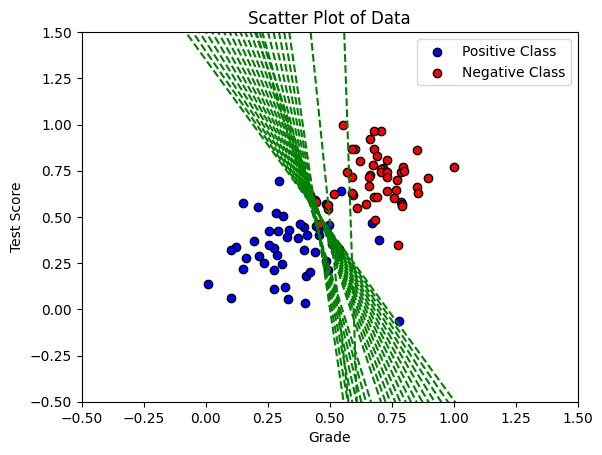

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(42)

# Load data
data = pd.read_csv('data/data_perceptron.csv', header=None, names=["grade", "test_score", "label"])
X = data[['grade', 'test_score']].values
y = data.label.values

# Plot the data
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Positive Class', marker='o', color = 'b', edgecolors='black')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Negative Class', marker='o', color = 'r', edgecolors='black')

# Add labels and legend
plt.xlabel('Grade')
plt.ylabel('Test Score')
plt.title('Scatter Plot of Data')

# Train the perceptron algorithm
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25)

# Set the limits of the x and y axes
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# Plot the boundary lines
for i, line in enumerate(boundary_lines):
    slope, intercept = line
    x_values = np.linspace(-0.5, 1.5, 100)  # Adjust the range of x_values to match the limits of the x axis
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, 'g--')

plt.legend()

# Show the plot
plt.show()
